In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.datasets import imdb
from konlpy.tag import Twitter
from konlpy.tag import Okt
from konlpy.tag import Kkma 
from konlpy.tag import Twitter
from pprint import pprint
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora, models
import numpy  as np
from PIL import Image
from wordcloud import ImageColorGenerator
import glob
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

In [3]:
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'
ch_str = '统一码'

In [5]:
print(ko_str[1])

것


In [6]:
print(ord(ko_str[0]))
print(ord(ja_str[0]))
print(ord(en_str[0]))
print(ord(ch_str[0]))

51060
12371
84
32479


In [8]:
# Unicode 코드 포인트로 출현 빈도 판정하기 --- (*1)
def count_codePoint(str):
    # Unicode 코드 포인트를 저장할 배열 준비하기 --- (*2)
    counter = np.zeros(65535)
    for i in range(len(str)):
        # 각 문자를 Unicode 코드 포인트로 변환하기 --- (*3)
        code_point = ord(str[i])
        if code_point > 65535 :
            continue
        # 출현 횟수 세기 --- (*4)
        counter[code_point] += 1

    # 각 요소를 문자 수로 나눠 정규화하기 --- (*5)
    counter = counter/len(str)
    return counter

In [28]:
# 학습 전용 데이터 준비하기
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'

x_train = [count_codePoint(ko_str),count_codePoint(ja_str),count_codePoint(en_str)]
y_train = ['ko','ja','en']

In [30]:
print(x_train[0])
print(np.where(x_train[0] > 0))

idx = np.where(x_train[0] > 0)
data = x_train[0]
print(data[idx])

[0. 0. 0. ... 0. 0. 0.]
(array([   32,    46, 44163, 44397, 45768, 45796, 47928, 50612, 51008,
       51060, 51077, 51109, 54620], dtype=int64),)
[0.14285714 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857]


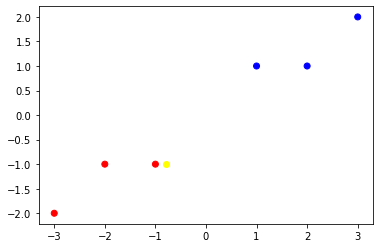

In [18]:
#X = np.array([[-1, -1], [3, 2]])
#Y = np.array([1,  2])

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#Y = np.array([1, 1, 1, 2, 2, 2])
Y = ['r', 'r', 'r', 'b', 'b', 'b']


color = [ 'red' if y == 'r' else 'blue' for y in Y]

plt.scatter(X[:, 0], X[:, 1], color=color)

t = np.array([[-0.8, -1]])

plt.scatter(t[:,0], t[:,1], color='yellow')

In [21]:
clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict([[2.5, 1.3], [0,0]]))

['b' 'b']


In [33]:
clf.fit([[0,0], [0,1], [1,0], [1,1]], [0,1,1,0])
print(clf.predict([[0, 1]]))

[0]


In [34]:
# 학습하기 --- (*6)
clf = GaussianNB() 
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_pred = clf.predict([count_codePoint('统一码')])
print(y_pred)

['ja']


In [44]:
# 평가 전용 데이터 준비하기
ko_test_str = '안녕'
ja_test_str = 'こんにちは'
en_test_str = 'Hello'
x_test = [count_codePoint(en_test_str),count_codePoint(ja_test_str),count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

# 평가하기 --- (*7)
y_pred = clf.predict(x_test)
print(y_pred)
print(y_test)
print("정답률 = " , accuracy_score(y_test, y_pred))

['en' 'ja' 'ja']
['en', 'ja', 'ko']
정답률 =  0.6666666666666666


In [46]:
# 학습 데이터 준비하기 --- (*1)
x_train = []
y_train = []
for file in glob.glob('./train/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기 --- (*2)
    print(file)
    y_train.append(file[8:10])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기 --- (*3)
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        file_str = file_str + line
    x_train.append(count_codePoint(file_str))

./train\de_cat.txt
./train\de_dog.txt
./train\de_elephant.txt
./train\en_cat.txt
./train\en_dog.txt
./train\en_elephant.txt
./train\es_cat.txt
./train\es_dog.txt
./train\es_elephant.txt


In [47]:
# 학습하기
clf = GaussianNB() 
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
y_pred = clf.predict([count_codePoint('hello. my name is ')])
print(y_pred)

['de']


In [48]:
# 평가 데이터 준비하기 --- (*4)
x_test = []
y_test = []
for file in glob.glob('./test/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기
    y_test.append(file[7:9])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        file_str = file_str + line
    x_test.append(count_codePoint(file_str)) 

# 평가하기
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))  

['de' 'en' 'es']
정답률 =  1.0


In [17]:
corpus = [
    'you know I want your love',                
    'I like you',
    'what should I do ',    
    'what should',    
    'should what',    
]

In [12]:
str = " ".join(corpus)
print(str)
words = str.split(' ')
print(words)
freq = {}
for w in words :
    freq[w] = freq.get(w, 0) + 1
print(freq)    

you know I want your love I like you what should I do 
['you', 'know', 'I', 'want', 'your', 'love', 'I', 'like', 'you', 'what', 'should', 'I', 'do', '']
{'you': 2, 'know': 1, 'I': 3, 'want': 1, 'your': 1, 'love': 1, 'like': 1, 'what': 1, 'should': 1, 'do': 1, '': 1}


In [18]:
vector = CountVectorizer()
tf = vector.fit_transform(corpus)
print(tf)
print(tf.toarray())

  (0, 7)	1
  (0, 1)	1
  (0, 5)	1
  (0, 8)	1
  (0, 3)	1
  (1, 7)	1
  (1, 2)	1
  (2, 6)	1
  (2, 4)	1
  (2, 0)	1
  (3, 6)	1
  (3, 4)	1
  (4, 6)	1
  (4, 4)	1
[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0 0]]


In [19]:
print(tf.shape)  # 문장, 단어수

(5, 9)


In [20]:
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [21]:
print(vector.vocabulary_['you'])
print(vector.vocabulary_.get('you'))   

7
7


In [22]:
words = vector.get_feature_names()
for word in words: print(word)
    
for key in vector.vocabulary_: 
    print(key, vector.vocabulary_[key])

do
know
like
love
should
want
what
you
your
you 7
know 1
want 5
your 8
love 3
like 2
what 6
should 4
do 0


TF-IDF ( Term Frequency - Inverse Document Frequency)

- TF : 현재 문서에서 단어 A가 나타난 횟수
- DF : 단어가 나타난 문서의 수
- 특정 단어의 상대적인 빈도를 나타내주는 값
- 값이 클 수록 내 문서에만 많이 언급되는 단어(=다른 문서에서는 잘 언급 안됨)
- 값이 작을수록 다른 문서에 잘 언급하는 단어를 의미(=현재 문서와 관련 없음)

<img src=tfidf.png width=400>

In [24]:
sent = ["오늘 휴일", 
        "휴일 오늘", 
        "휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.", 
        " 내일 은 반가운 비 소식 이 있습니다."] 

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) #문장 벡터화 진행
print(tfidf_matrix)

  (0, 17)	0.6437444595062429
  (0, 7)	0.7652405313723362
  (1, 17)	0.6437444595062429
  (1, 7)	0.7652405313723362
  (2, 12)	0.28487998702172107
  (2, 6)	0.28487998702172107
  (2, 4)	0.28487998702172107
  (2, 1)	0.28487998702172107
  (2, 9)	0.35310140100264525
  (2, 14)	0.28487998702172107
  (2, 8)	0.35310140100264525
  (2, 13)	0.35310140100264525
  (2, 5)	0.35310140100264525
  (2, 17)	0.19893117008503197
  (2, 7)	0.23647612349029334
  (3, 11)	0.3542556015420614
  (3, 16)	0.3542556015420614
  (3, 3)	0.3542556015420614
  (3, 10)	0.3542556015420614
  (3, 0)	0.3542556015420614
  (3, 2)	0.3542556015420614
  (3, 15)	0.3542556015420614
  (3, 14)	0.28581118874948447
  (3, 17)	0.1995814265359179
  (4, 12)	0.5
  (4, 6)	0.5
  (4, 4)	0.5
  (4, 1)	0.5


In [65]:
idf = tfidf_vectorizer.idf_ 
print(idf)

[2.09861229 1.69314718 2.09861229 2.09861229 1.69314718 2.09861229
 1.69314718 1.40546511 2.09861229 2.09861229 2.09861229 2.09861229
 1.69314718 2.09861229 1.69314718 2.09861229 2.09861229 1.18232156]


In [25]:
print(tfidf_matrix.toarray().shape)
print(tfidf_matrix.toarray())

(5, 18)
[[0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.28487999 0.         0.         0.28487999 0.3531014
  0.28487999 0.23647612 0.3531014  0.3531014  0.         0.
  0.28487999 0.3531014  0.28487999 0.         0.         0.19893117]
 [0.3542556  0.         0.3542556  0.3542556  0.         0.
  0.         0.         0.         0.         0.3542556  0.3542556
  0.         0.         0.28581119 0.3542556  0.3542556  0.19958143]
 [0.         0.5        0.         0.         0.5        0.
  0.5        0.         0.         0.         0.         0.
  0.5        0.         0.         0.         0.         0.        ]]


In [26]:
features = tfidf_vectorizer.get_feature_names()
print(features)

['갑작스런', '내일', '놀러왔다가', '망연자실', '반가운', '서쪽', '소식', '오늘', '으로', '이어졌는데요', '인해', '있습니', '있습니다', '중심', '폭염', '피해서', '하고', '휴일']


In [45]:
mat = np.array(tfidf_matrix.toarray())
srch=['갑작스런', '휴일']
print([  tfidf_vectorizer.vocabulary_.get(i) for i in srch])

srch_dtm = mat[:, [  tfidf_vectorizer.vocabulary_.get(i) for i in srch]]

#srch_dtm = mat[:, [ 7,17]]   
#srch_dtm = mat[:, 7]   

print(srch_dtm)

[0, 17]
[[0.         0.64374446]
 [0.         0.64374446]
 [0.         0.19893117]
 [0.3542556  0.19958143]
 [0.         0.        ]]


0.19078293545454547

In [36]:
score = srch_dtm.sum(axis=1)
print(score)

for i in range(len(score)):
    if score[i] > 0:
        print('{} / score : {}'.format(sent[i], score[i]))  

[0.76524053 0.76524053 0.52135611 0.28581119 0.        ]
오늘 휴일 / score : 0.7652405313723362
휴일 오늘 / score : 0.7652405313723362
휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다. / score : 0.5213561105120144
폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다. / score : 0.28581118874948447


In [37]:
sentences = ['This is the first document.',
              'This is the second document.',
              'And the third one.',
              'Is this the first document?']
vect = TfidfVectorizer()
X = vect.fit_transform(sentences)

In [52]:
y = [1,1,2,2]
model =  SGDClassifier(loss='perceptron')  
model.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
X_pred = vect.transform(['My new document third'])
y_pred = model.predict(X_pred)
print(y_pred)

[3]


In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)  # 단어 빈도수 상위 10000개 사용, 적을 수록 단어가 제한되어 나옴
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
#위에서 num_words는 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지를 사용할 것인지 조절하는 것입니다. 예를 들어서 10,000이란 값을 넣으면, 등장 빈도 순위가 1~10,000에 해당하는 단어만 사용하게 됩니다. 즉, 단어의 종류는 10,000개가 되므로 단어 집합의 크기는 10,000이 됩니다.

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))
# 이 경우에는 긍정을 의미하는 1의 값을 가집니다. 0은 부정

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [3]:
print(X_train[0])# 각 숫자가 단어임
print(len(X_train[0])) # 218, 218개의 단어로 구성되어 있다는 말임
print(len(X_train[1])) # 189 개의 단어로 구성

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
189


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


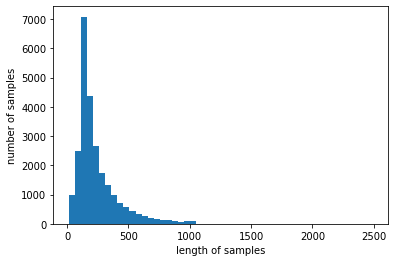

In [5]:
print('리뷰의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [7]:
word_to_index = imdb.get_word_index()    # 없으면 다운로드함
word_to_index # 각 단어의 dict가 있다.

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [9]:
index_to_word={} 
for key, value in word_to_index.items(): #키와 벨류를 변경
    index_to_word[value] = key
index_to_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [16]:
# for i in X_train[0]:
#    print(index_to_word[i], end=' ')

print(' '.join([index_to_word[i] for i in X_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [17]:
X_train_s = [' '.join([index_to_word[i] for i in X_train[j]]) for j in range(25000)   ] #25000개의 문장이 나옴
X_test_s = [' '.join([index_to_word[i] for i in X_test[j]]) for j in range(25000)   ]


In [20]:
#X_train_s
#X_test_s

In [21]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(X_train_s+X_test_s) # 트레인과 테스트를 합쳐서 학습

# transform the training and test data using count vectorizer object
xtrain_count =  count_vect.transform(X_train_s) # 단어를 워드카운터로 변형
print(xtrain_count.shape)
xtest_count =  count_vect.transform(X_test_s)
print(xtest_count.shape)

(25000, 9774)
(25000, 9774)


In [23]:
print(len(X_train[0])) # 실제는 218개가 아닐 수 있다.
print(xtrain_count[0])  #(0, 138) 1, 0번쨰의 138 버은 1이 아니다?

218
  (0, 138)	1
  (0, 224)	1
  (0, 312)	1
  (0, 456)	3
  (0, 463)	6
  (0, 523)	1
  (0, 527)	2
  (0, 597)	1
  (0, 632)	3
  (0, 676)	1
  (0, 681)	1
  (0, 829)	1
  (0, 893)	1
  (0, 1005)	1
  (0, 1069)	1
  (0, 1151)	2
  (0, 1299)	3
  (0, 1340)	1
  (0, 1529)	1
  (0, 1580)	1
  (0, 2171)	1
  (0, 2220)	1
  (0, 2668)	1
  (0, 3021)	1
  (0, 3114)	2
  :	:
  (0, 8766)	1
  (0, 8772)	2
  (0, 8779)	3
  (0, 8780)	1
  (0, 8792)	2
  (0, 8816)	1
  (0, 8889)	9
  (0, 9094)	2
  (0, 9173)	1
  (0, 9318)	1
  (0, 9382)	1
  (0, 9442)	1
  (0, 9466)	3
  (0, 9470)	1
  (0, 9475)	1
  (0, 9544)	1
  (0, 9550)	2
  (0, 9555)	1
  (0, 9557)	1
  (0, 9575)	1
  (0, 9593)	1
  (0, 9633)	11
  (0, 9655)	1
  (0, 9732)	1
  (0, 9744)	6


In [24]:
model = LinearSVC() #선형 SVC가 단층 퍼셉트론 보다 성능이 조금 잘나온다.
model.fit(xtrain_count, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [26]:
y_pred = model.predict(xtest_count) #  문장을 count 벡터로 만들고 predict 해야 함
print(len(y_pred)) #25000
print(y_pred)
sum((y_test == y_pred)*1) / print(len(y_pred)) # y_test == y_pred 결과가 True/False로 나오기 때문에 1을 곱하여 0또는 1로 나오도록 출력 후 25000 나누기

25000
[0 1 1 ... 0 0 1]


0.83

In [36]:
review = """
Genius Hacker's Victory Is Bomb Terrorist's Victory

Citizen's safety is threatened as two heads fight

I can't waste one minute and one second How do I cope with the threat of a tightening criminal?

I really like this kind of movie.

I'm going to go to the theater once in the weekend.

Let's take a few shots and put the video below."""
str_count =  count_vect.transform([review]) #리스트 식으로 넣어 주어야 함
y_pred = model.predict(str_count)


In [37]:
print(y_pred)

[1]


In [38]:
#tfidf 기반으로 계산
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(X_train_s+X_test_s)
xtrain_tfidf =  tfidf_vect.transform(X_train_s)
xtest_tfidf =  tfidf_vect.transform(X_test_s)

In [39]:
model = LinearSVC()
model.fit(xtrain_tfidf, y_train)
y_pred = model.predict(xtest_tfidf)
sum((y_test == y_pred)*1) / 25000

0.87456

In [41]:
## https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
#파이선 모듈과 자바 모듈이 달라서 에러가 난다. 수동설치가 필요하다. 파이선 버전(3.7)과 윈도우 비트(64) 확인
#관리자 모드로 pip uninstall jpype1 실행 후 모듈 설치
# pip install JPype1-0.7.1-cp37-cp37m-win_amd64.whl
okt = Okt() 
malist = okt.pos("아버지 가방에 들어가신다.", norm=True, stem=True) 
print(malist)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [42]:
print(okt.nouns(u'을지로 3가역 주변 첨단빌딩숲 사이에 자리 잡은 커피집'))
print(okt.pos(u'이것도 되나요ㅋㅋ'))
print(okt.pos(u'이것도 되나요ㅋㅋ', norm=True, stem=True))


['을지로', '역', '주변', '첨단', '빌딩', '숲', '사이', '자리', '커피집']
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나요', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


In [44]:
print(okt.nouns('오늘 부산 날씨 어때'))
print(okt.pos('짜장면 2개, 짬뽕 2개 주세요 오늘 부산 날씨 어때'))

['오늘', '부산', '날씨']
[('짜장면', 'Noun'), ('2', 'Number'), ('개', 'Noun'), (',', 'Punctuation'), ('짬뽕', 'Noun'), ('2', 'Number'), ('개', 'Noun'), ('주세요', 'Verb'), ('오늘', 'Noun'), ('부산', 'Noun'), ('날씨', 'Noun'), ('어때', 'Adjective')]


In [46]:
kkma = Kkma() # 서울대에서 만든 형태소 분석기?
# 문장 분리
print('kkma 문장분리 : ', kkma.sentences('안녕하세요. 반갑습니다. 저는 인공지능입니다.'))   
# 명사 추출
print('kkma 명사만 추출 : ', kkma.nouns('을지로 3가역 주변 첨단빌딩숲 사이에 자리 잡은 커피집'))
print(kkma.nouns('오늘 부산 날씨 어때'))
print(kkma.porphs('짜장면 2개, 짬뽕 2개 주세요 오늘 부산 날씨 어때'))

kkma 문장분리 :  ['안녕하세요.', '반갑습니다.', '저는 인공지능입니다.']
kkma 명사만 추출 :  ['을지', '3', '역', '주변', '첨단', '첨단빌딩숲', '빌딩', '숲', '사이', '자리', '커피', '커피집', '집']
['오늘', '부산', '날씨', '때']


AttributeError: 'Kkma' object has no attribute 'porphs'